## Спектры сложных сетей

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from itertools import product

Напишем вспомогательную функцию вывода матрицы: 

In [16]:
def plot_matrix(A, normalize=False):
    fmt = '.2f' if normalize else 'd'
    plt.imshow(A,cmap='PiYG') 
    thresh=A.max() / 2
    for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                plt.text(j, i, format(A[i, j], fmt),
                        ha="center", va="center",
                         color="white" if A[i, j] > thresh else "black")
    plt.axis('off')

Рассмотрим следующий граф:

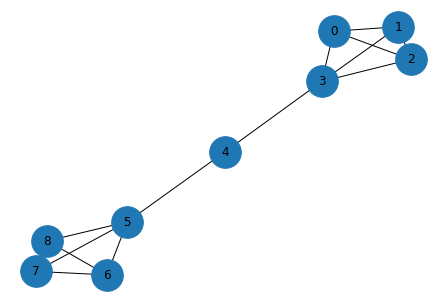

In [19]:
BR = nx.barbell_graph(4,1)
nx.draw(BR,node_size=1000,with_labels=True)

## Матрицы графа и их спектральные свойства

### 1. Матрица смежности: 
$$
A_{ij} = 
 \begin{cases}
   1, &\text{  $(i,j) \in E$},\\
   0, &\text{otherwise}.
 \end{cases}
$$

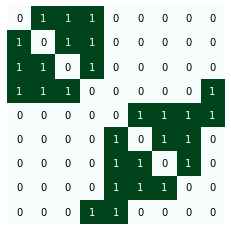

In [4]:
A=nx.adjacency_matrix(BR).todense()
plot_matrix(A)

#### Спектр 

Для симметричной матрицы воспользуемся [функцией](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvalsh.html) нахождения собственных значений Эрмитовой матрицы.

In [5]:
print(np.linalg.eigvalsh(A))

[-1.85577251 -1.         -1.         -1.         -1.         -1.
  0.67836283  3.          3.17740968]


Построим распределение собственных значений $\rho(\lambda)$:

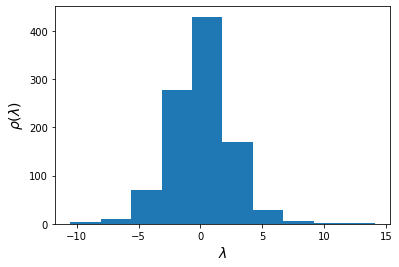

In [21]:
a=plt.hist(np.linalg.eigvalsh(A))
plt.xlabel(r'$\lambda$',fontsize=14)
plt.ylabel(r'$\rho(\lambda)$',fontsize=14)
plt.show()

#### Важно: 
число "изолированных" собственных значений показывает число сообществ (кластеров) в сети.

#### Собственные вектора
Principal eigenvector соответствует максимальному с.з. матрицы смежности и совпадает с eigenvector centrality

In [7]:
 w, v = LA.eigh(A)
print('Eigenvector=', np.ravel(v[:,-1]))
print('Eigenvector centrality=',list(nx.eigenvector_centrality(BR).values()))

Eigenvector= [-0.32752864 -0.32752864 -0.32752864 -0.38563539 -0.38563539 -0.32752864
 -0.32752864 -0.32752864 -0.24273571]
Eigenvector centrality= [0.32752831731291443, 0.32752831731291443, 0.32752831731291443, 0.38563582165174676, 0.38563582165174687, 0.3275283173129145, 0.3275283173129145, 0.3275283173129145, 0.24273696518451682]


### 2. Матрица Лапласа: 
$$
L=D-A, $$

$$
L_{ij}=
 \begin{cases}
   k_i, &\text{  $i=j$},\\
   -1, &\text{  $ i \neq j,  (i,j) \in E$},\\
   0, &\text{  otherwise}.\\
 \end{cases}
$$

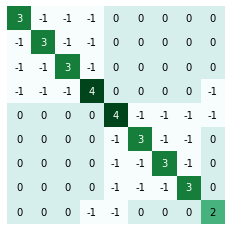

In [8]:
L=nx.laplacian_matrix(BR).todense()
plot_matrix(L)

In [39]:
(1, 0) in BR.edges()

True

#### Спектр 
всегда содержит $\lambda=0$, число нулевых с.з. совпадает с числом компонент графа. Первое ненулевое с.з. называется [алгебраической связностью графа](https://en.wikipedia.org/wiki/Algebraic_connectivity), оно коррелирует с числом ребер, которые надо удалить, чтобы развалить граф на несвязанные компоненты. 

In [9]:
print(np.linalg.eigvalsh(L))

[5.48172618e-16 2.08712153e-01 1.69722436e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00 4.00000000e+00 4.79128785e+00
 5.30277564e+00]


Добавим ребро $(3,5)$ и посмотрим как изменится алгебраическая связность графа:

In [10]:
print('Algebraic connectivity=', LA.eigvalsh(L)[1])
BR.add_edge(3,5) # добавим еще одно ребро в граф
print('Algebraic connectivity=', LA.eigvalsh(nx.laplacian_matrix(BR).todense())[1])
BR.remove_edge(3,5)

Algebraic connectivity= 0.2087121525220802
Algebraic connectivity= 0.45861873485089033


#### Собственные вектора
* Fiedler vector соответствует первому ненулевому с.з. матрицы Лапласа

In [11]:
print('Fiedler vector=', nx.fiedler_vector(BR))

Fiedler vector= [-3.71332471e-01 -3.71332471e-01 -3.71332471e-01 -2.93830875e-01
  2.93830872e-01  3.71332476e-01  3.71332476e-01  3.71332476e-01
 -1.09644509e-08]


Знак компонент фидлеровского вектора показывает на "принадлежность" к сообществу(кластеру).

### Спектры случайных графов
* графы Эрдеша-Реньи

Почти все собственные значения лежат на интервале $\left[-2r, 2r\right]$, где:
$$
r=\sqrt{Np(1-p)}.
$$Спектральная плотность удовлетворяет 
$$
\rho(\lambda)=\frac{\sqrt{4-\left(\displaystyle\frac{\lambda}{r}\right)^2}}{2\pi}
$$


/home/kim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, '$\\rho(\\lambda)$')

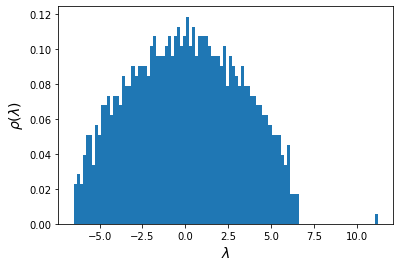

In [12]:
N,p=1000,0.01
ER=nx.erdos_renyi_graph(N,p)
A=nx.adjacency_matrix(ER).todense()

spec=LA.eigvalsh(A)
a=plt.hist(spec,bins=100,normed=True)

plt.xlabel(r'$\lambda$',fontsize=14)
plt.ylabel(r'$\rho(\lambda)$',fontsize=14)


Изолированное собственное значение соответсвует одной компоненте связности, и удовлетворяет неравенству $k_{min}<\lambda_1<k_{max}$, где $k_{min}$ и $k_{max}$ - наименьшее и наибольшее значения степени в сети. 

Построим теоретический полукруг:

/home/kim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, '$\\rho(\\lambda)$')

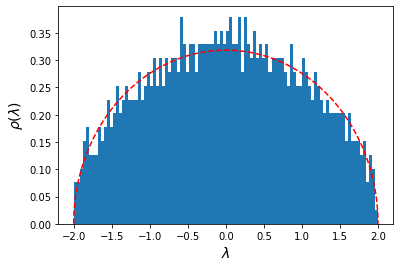

In [13]:
r=np.sqrt(N*p*(1-p))
a=plt.hist(spec/r,bins=100,range=[-2,2],normed=True)
plt.plot(np.linspace(-2,2,1000),
         np.sqrt(4-np.linspace(-2,2,1000)**2)/(2*np.pi),'--',color='r')

plt.xlabel(r'$\lambda$',fontsize=14)
plt.ylabel(r'$\rho(\lambda)$',fontsize=14)

* Барабаши-Альберта

Спектр случайного графа Барабаши-Альберта имеет характерный треугольний вид. Спектральная плотность подчиняется зависимости:
$$
\rho(\lambda)=
 \begin{cases}
  \displaystyle ( \frac{\lambda}{r}+2)/4, &\text{  $ -2\le \lambda/r \le 0$},\\
   \displaystyle ( 2-\frac{\lambda}{r})/4, &\text{  $ 0\le \lambda/r \le 2$},\\
   0, &\text{  otherwise}.\\
 \end{cases}
$$


Text(0, 0.5, '$\\rho(\\lambda)$')

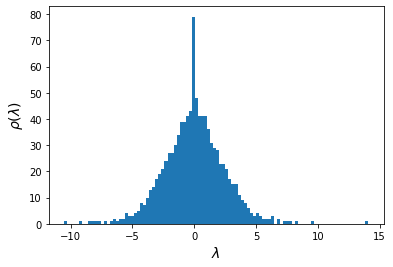

In [14]:
N=1000
BA=nx.barabasi_albert_graph(N,3)
A=nx.adjacency_matrix(BA).todense()
spec=LA.eigvalsh(A)
a=plt.hist(spec,bins=100)

plt.xlabel(r'$\lambda$',fontsize=14)
plt.ylabel(r'$\rho(\lambda)$',fontsize=14)

/home/kim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '$\\rho(\\lambda)$')

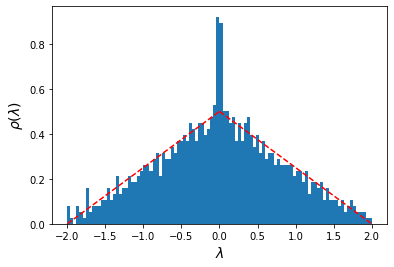

In [15]:
p=nx.density(BA)
r=np.sqrt(N*p*(1-p))
a=plt.hist(spec/r,bins=100,range=[-2,2],normed=True)

plt.plot(np.linspace(-2,0,1000),
         (np.linspace(-2,0,1000)+2)/4,'--',color='r')

plt.plot(np.linspace(0,2,1000),
         (-np.linspace(0,2,1000)+2)/4,'--',color='r')

plt.xlabel(r'$\lambda$',fontsize=14)
plt.ylabel(r'$\rho(\lambda)$',fontsize=14)